In [1]:
import os 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import sklearn
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve_sklearn(estimator, X, y, title="Learning Curve", cv=3):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Accuracy')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [4]:
train = r'C:\Users\ma3\Desktop\ml dataset\seg_train'
test = r'C:\Users\ma3\Desktop\ml dataset\seg_test'

In [5]:
image_classes = os.listdir(train)


In [6]:
image_classes


['buildings', 'forest', 'glacier']

In [7]:
for i, category in enumerate(image_classes):
        image_path = os.path.join(train, category)
        print ("image_path ------->  ",image_path)
    
        images_in_folder = os.listdir(image_path)
        print ("images_in_folder ------->  ",images_in_folder)
    
        first_image = images_in_folder[0]
        print ("images_in_folder[0] ------->  ",images_in_folder[0])
    
        first_image_path = image_path + '/' + first_image
        print ("first_image_path ------->  ",first_image_path)
    
        img = image.load_img(first_image_path)
        print (img)

image_path ------->   C:\Users\ma3\Desktop\ml dataset\seg_train\buildings
images_in_folder ------->   ['0.jpg', '10006.jpg', '1001.jpg', '10014.jpg', '10018.jpg', '10029.jpg', '10032.jpg', '10056.jpg', '1009.jpg', '10113.jpg', '1012.jpg', '10126.jpg', '10144.jpg', '10151.jpg', '10161.jpg', '10165.jpg', '10176.jpg', '10184.jpg', '10185.jpg', '10191.jpg', '10196.jpg', '10198.jpg', '10205.jpg', '10210.jpg', '10228.jpg', '10231.jpg', '10251.jpg', '10252.jpg', '10257.jpg', '10266.jpg', '10278.jpg', '1028.jpg', '10295.jpg', '10303.jpg', '10306.jpg', '10310.jpg', '10312.jpg', '10316.jpg', '10318.jpg', '10328.jpg', '10350.jpg', '10357.jpg', '10362.jpg', '10367.jpg', '10374.jpg', '10383.jpg', '10402.jpg', '1041.jpg', '10421.jpg', '10444.jpg', '1045.jpg', '10452.jpg', '10466.jpg', '10480.jpg', '10485.jpg', '10489.jpg', '10495.jpg', '10499.jpg', '10500.jpg', '10502.jpg', '10511.jpg', '10520.jpg', '10528.jpg', '1055.jpg', '10553.jpg', '10559.jpg', '10570.jpg', '10576.jpg', '1058.jpg', '10582.jpg',

In [8]:
def plot_images(image_classes):
    plt.figure(figsize = (14,14))
    
    for i, category in enumerate(image_classes):
        image_path = train + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(4, 4, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

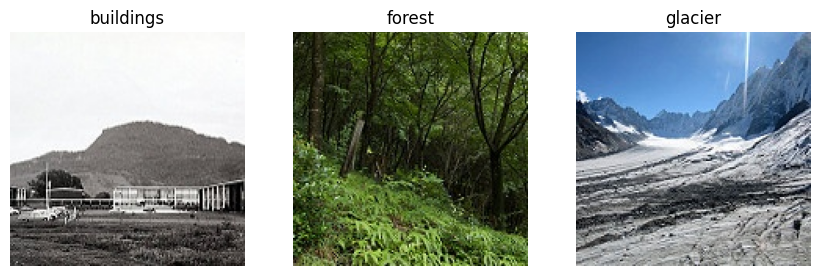

In [9]:
plot_images(image_classes)

In [10]:
def load_images_from_directory(base_path, image_size=(64, 64)):
    X = []
    y = []
    class_names = os.listdir(base_path)

    for class_name in class_names:
        class_path = os.path.join(base_path, class_name)
        for img_file in os.listdir(class_path)[:500]:  # Take first 500 image only
            try:
                img_path = os.path.join(class_path, img_file)
                img = load_img(img_path, target_size=image_size, color_mode='grayscale')
                img_array = img_to_array(img).flatten() / 255.0
                X.append(img_array)
                y.append(class_name)
            except:
                continue

    return np.array(X), np.array(y)

In [11]:
x_train, y_train = load_images_from_directory(train)
x_test, y_test = load_images_from_directory(test)

In [12]:
label_map = {'buildings': 0, 'forest': 1, 'glacier': 2}
inverse_label_map = {v: k for k, v in label_map.items()}

In [13]:
y_train = [label_map[label] for label in y_train]
y_test = [label_map[label] for label in y_test]

In [14]:
log_model = LogisticRegression(max_iter=1000)

In [15]:
log_model.fit(x_train , y_train)

LogisticRegression(max_iter=1000)

In [16]:
y_pred_log = log_model.predict(x_test)

In [17]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.46      0.36      0.40       437
           1       0.65      0.59      0.62       474
           2       0.56      0.72      0.63       500

    accuracy                           0.56      1411
   macro avg       0.56      0.55      0.55      1411
weighted avg       0.56      0.56      0.55      1411



<Axes: >

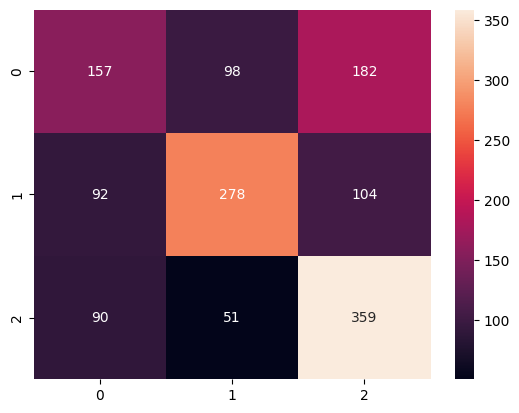

In [18]:
matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(matrix, annot=True, fmt='d', cbar=True)

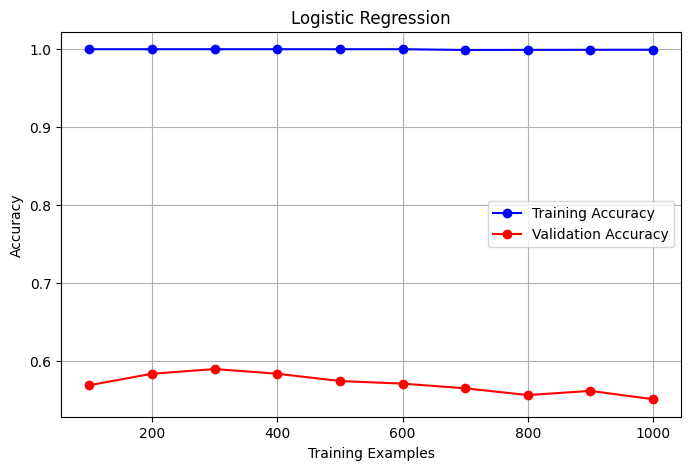

In [19]:
plot_learning_curve_sklearn(log_model, x_train, y_train, title="Logistic Regression")

In [20]:
svm = SVC()
param_grid = {
    'max_iter': [100, 500, 1000],
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [21]:
svm_grid = GridSearchCV(svm, param_grid,n_jobs=-1)

In [22]:
svm_grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [100, 500, 1000]})

In [23]:
svm_grid.best_estimator_

SVC(C=10, max_iter=1000)

In [24]:
y_pred_grid_svm = svm_grid.predict(x_test)

In [25]:
print(classification_report(y_test, y_pred_grid_svm))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       437
           1       0.76      0.78      0.77       474
           2       0.75      0.76      0.76       500

    accuracy                           0.72      1411
   macro avg       0.71      0.71      0.71      1411
weighted avg       0.72      0.72      0.72      1411



<Axes: >

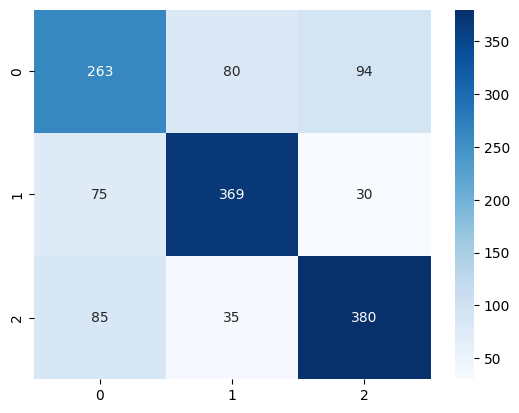

In [26]:
matrix = confusion_matrix(y_test, y_pred_grid_svm)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',cbar=True)

In [27]:
tree1 = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [5, 10, 15, 20 , 25 , 30 , 35],
}

In [28]:
grid_tree_model = GridSearchCV(tree1,params)

In [29]:
grid_tree_model.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 35]})

In [30]:
grid_tree_model.best_estimator_

DecisionTreeClassifier(max_depth=10)

In [31]:
y_pred_tree = grid_tree_model.predict(x_test)

In [32]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.43      0.48      0.45       437
           1       0.60      0.59      0.60       474
           2       0.58      0.53      0.55       500

    accuracy                           0.54      1411
   macro avg       0.54      0.53      0.53      1411
weighted avg       0.54      0.54      0.54      1411



<Axes: >

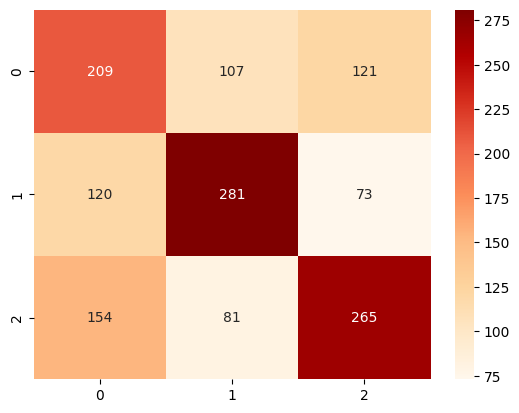

In [33]:
matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(matrix, annot=True, fmt='d',cmap='OrRd',cbar=True)

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20]
}

In [35]:
rf_grid_model = GridSearchCV(rf_model , param_grid)

In [36]:
rf_grid_model.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [37]:
y_pred_rf = rf_grid_model.predict(x_test)

In [38]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       437
           1       0.73      0.82      0.77       474
           2       0.74      0.72      0.73       500

    accuracy                           0.70      1411
   macro avg       0.70      0.70      0.70      1411
weighted avg       0.70      0.70      0.70      1411



<Axes: >

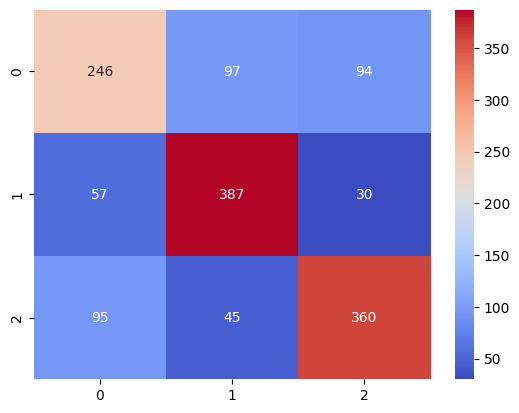

In [39]:
matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix, annot=True, fmt='d',cmap='coolwarm',cbar=True)

In [40]:
from joblib import dump

dump(log_model, 'logistic.joblib')
dump(svm_grid, 'svm.joblib')
dump(grid_tree_model, 'tree.joblib')
dump(rf_grid_model, 'rf.joblib')

['rf.joblib']

In [41]:
ls

 Volume in drive C has no label.
 Volume Serial Number is BE70-078A

 Directory of C:\Users\ma3

05/18/2025  06:54 PM    <DIR>          .
05/18/2025  06:54 PM    <DIR>          ..
10/09/2023  03:12 PM    <DIR>          .anaconda
11/12/2023  07:38 PM    <DIR>          .android
04/17/2025  06:19 PM    <DIR>          .arduinoIDE
05/18/2025  06:54 PM    <DIR>          .conda
10/09/2023  03:13 PM                25 .condarc
10/09/2023  03:12 PM    <DIR>          .continuum
05/18/2025  02:59 PM    <DIR>          .ipynb_checkpoints
10/09/2023  03:14 PM    <DIR>          .ipython
10/16/2023  05:57 PM    <DIR>          .jupyter
05/18/2025  01:06 PM    <DIR>          .keras
10/18/2024  03:02 PM    <DIR>          .matplotlib
09/17/2023  09:25 AM    <DIR>          .ms-ad
08/06/2024  07:05 PM               172 .packettracer
10/18/2024  03:47 PM    <DIR>          .spyder-py3
12/23/2024  01:44 PM    <DIR>          .VirtualBox
09/19/2023  12:12 PM    <DIR>          .vscode
10/16/2023  01:19 PM    <DIR>